<h1><center>Forecasting Consumer Purchase Intentions</center></h1>

>[1 Introduction](#scrollTo=kjteaONYojZZ)

>[2 Problem analysis](#scrollTo=CJorA4mAooAk)

>>[2.1 Purpose and stakeholders analysis](#scrollTo=3ZDi_UFnJcRN)

>>[2.2 Designed data analytics lifecycle](#scrollTo=ughPM-HEKgio)

>>[2.3 Initial hypotheses](#scrollTo=rmdjfi6CNBbf)

>[3 Data preparation (ETL)](#scrollTo=RcBghublornT)

>>[3.1 Import libraries](#scrollTo=Pjf0mLtDo8MI)

>>[3.2 Load the dataset](#scrollTo=0jGur4BupbFE)

>>[3.3 Data pre-processing](#scrollTo=8Q0cTc9MtMzf)

>>>[3.3.1 Check duplicates in the dataset](#scrollTo=Q_Rej-FgtlIA)

>>>[3.3.2 Check missing values in the dataset](#scrollTo=GX1rzsGAvagk)

>>>[3.3.3 Check outliers in the dataset](#scrollTo=XgGVOttFIAlF)

>>>[3.3.4 Convert the gender to numerical values using one-hot encoding](#scrollTo=EgrL8upZKo5d)

>>>[3.3.4 Data visualization](#scrollTo=9GsgaEKPNVCE)

>>>[3.3.5 Explore the correlation of different variables and feature selection](#scrollTo=6JDav1RzzM5m)

>>>[3.3.6 Class imbalance problem](#scrollTo=tDej9422GKv1)

>[4 Model building](#scrollTo=EJ_oL7PDT4cr)

>>[4.1 Shuffle](#scrollTo=SsFkbwAOUGre)

>>[4.2 Split data set](#scrollTo=tlXMQflmU6VY)

>>[4.3 Standardize the data](#scrollTo=DtdwwKsAQaCA)

>>[4.4 Model selection](#scrollTo=od2IvZ5LWR_8)

>>>[4.4.1 GaussianNB](#scrollTo=UxXKSH9QYg-L)

>>>[4.4.2 Logistic regression](#scrollTo=kgw0XtHKZaNL)

>>>[4.4.3 Model comparison](#scrollTo=7A6xsAI3am5u)

>[5 Discussion](#scrollTo=jOO6LpgzvWqW)



# 1 Introduction

This project used a structured approach based on the Big Data Analytics Lifecycle to analyze the provided dataset. I explored data to identify key attributes and performed ETL to clean the data. With clean data, I trained a Logistic Regression model and Naive Bayes Classifier model to predict if a customer will have a purchasing behaviour, which will help the company make strategic decisions.

#2 Problem analysis

## 2.1 Purpose and stakeholders analysis

*   Purpose: Perform ETL to clean the data, conduct data analysis to extract valuable insights using storytelling, and build a Logistic Regression model and Naive Bayes Classifier model to predict if a user will have a purchasing behaviour.  

*   Stakeholders: the company and clients



## 2.2 Designed data analytics lifecycle

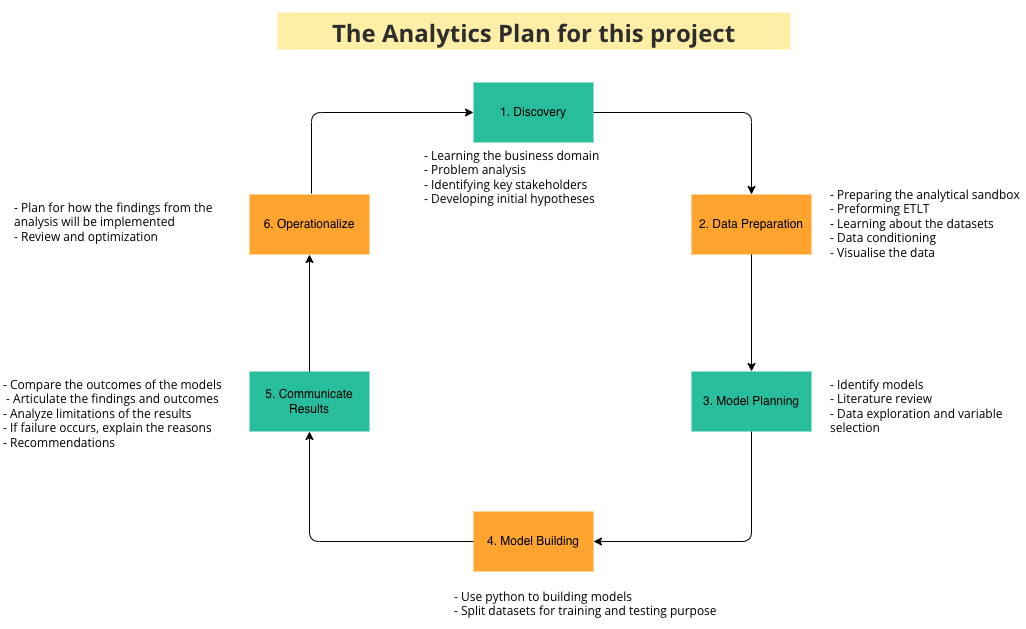

## 2.3 Initial hypotheses

Potential factors affecting a user's purchasing behaviour:

*   User's gender
*   User's age
*   User's salary

#3 Data preparation (ETL)

## 3.1 Import libraries
Before I preprocessed and analyzed the data, I imported the necessary libraries.

In [ ]:
# # import matplotlib.pylab as plt
# import matplotlib.pylab as pylab
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from matplotlib.transforms import interval_contains_open
# %matplotlib inline

import numpy as np

import os
import pandas as pd

import sklearn
from sklearn import linear_model, naive_bayes, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

# Import the train_test_split function from the sklearn.model_selection module.
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

## 3.2 Load the dataset

After reading and examining the dataset, I discovered that it consists of 400 records and encompasses five attributes. This information provides an initial understanding of the dataset's size and structure. Additionally, I have gained a comprehensive understanding of each attribute, allowing for further analysis and interpretation. Understanding the attributes is vital as it enables me to extract meaningful insights and perform data-driven tasks using this dataset. By leveraging this knowledge, I can proceed with data exploration, preprocessing, modeling, or any other required analysis tasks with a solid foundation.

In [ ]:
# Read the dataset
data = pd.read_csv('test2_data.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## 3.3 Data pre-processing

During the ETL (Extract, Transform, Load) process, I gave significant consideration to several important data aspects, including duplicates, missing values, outliers, and categorical value transformation.

Furthermore, I leveraged data visualization techniques to gain insights into the dataset's distribution, patterns, and relationships between variables. Visualizations aided in understanding the data's characteristics and identifying potential areas for feature engineering or selection.

By prioritizing these essential steps in the ETL process, including handling duplicates, missing values, outliers, transforming categorical values, data visualization, and feature engineering, I ensured the dataset's quality, prepared it for modeling, and improved the overall accuracy and reliability of the model training task.

### 3.3.1 Check duplicates in the dataset

I conducted a check for duplicates in the dataset and found that no duplicates are present. This result indicates that each record in the dataset is unique, without any exact replicas. The absence of duplicates is beneficial as it ensures the integrity of the data and prevents any redundancy or potential issues that could arise from duplicate entries. With this confirmation, we can proceed with confidence in the data quality and reliability, focusing on further analysis or modeling tasks without the need for duplicate handling.

In [ ]:
# check duplicates in the dataset. No duplicates are found.
data.duplicated().sum()

0

### 3.3.2 Check missing values in the dataset

I thoroughly checked for missing values, identifying any instances where data was not available. Handling missing values is crucial for accurate analysis. No missing value is found.

In [ ]:
# Check missing values in the dataset. No missing value is found
print('The sum of NaN data in each column:\n',data.isna().sum())

The sum of NaN data in each column:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


### 3.3.3 Check outliers in the dataset

Detecting and addressing outliers was another vital step in the ETL process. Outliers can significantly impact analysis and modelling results. No outlier is found in the Age and EstimatedSalary columns.

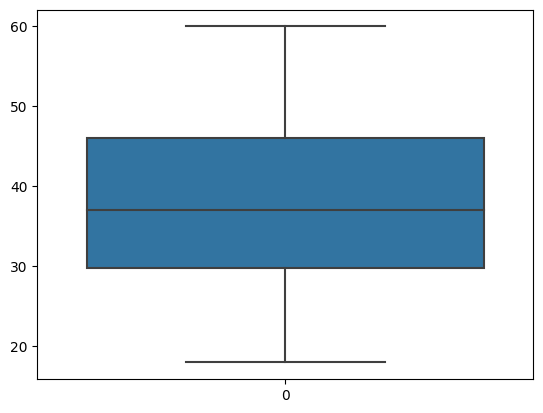

In [ ]:
# Boxplot of the Age column. No outliers are found.
sns.boxplot(data['Age'])
plt.show()

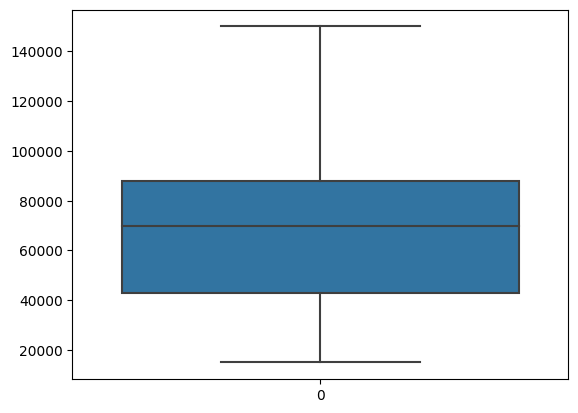

In [ ]:
# Boxplot of the EstimatedSalary column. No outliners are found.
sns.boxplot(data['EstimatedSalary'])
plt.show()

### 3.3.4 Convert the gender to numerical values using one-hot encoding

The process of converting categorical values into a format that could be provided to machine learning algorithms to improve their performance is often referred to as one-hot encoding. One-hot encoding allows machine learning models to understand and interpret categorical data by representing it in a numerical format. This technique avoids the issue of ordinality or implicit ordering in categorical variables, ensuring that the model treats each category independently.  

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(data, columns=['Gender'])
df_encoded

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


### 3.3.4 Data visualization

During the data analysis process, I visualized the distribution of values in the "Age" and "EstimatedSalary" columns. The visualizations revealed interesting patterns and insights regarding these variables.

In the "Age" column, I observed that a substantial proportion of users fall into the age groups of 38 and 42. This indicates a potential concentration or peak in the dataset around these specific ages. Further exploration and analysis of these age groups may be valuable for understanding user behavior or identifying specific target demographics.

Similarly, when examining the "EstimatedSalary" column, I found that a significant percentage of users have salaries within the range of 80000 to 90000. This concentration suggests a particular salary range that is prevalent among the dataset. This information can be useful for segmenting or targeting users based on their income level or conducting further analysis on the impact of salary on user behavior.

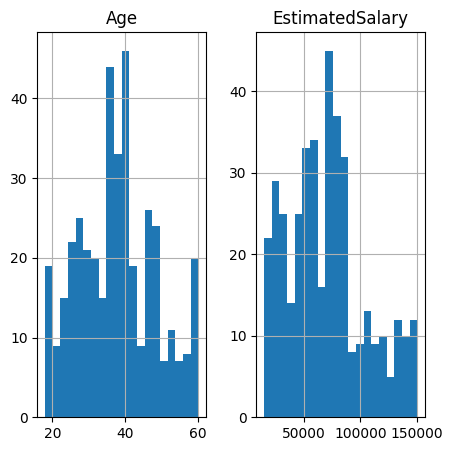

In [ ]:
show_hist = df_encoded[['Age', 'EstimatedSalary']]
p = show_hist.hist(figsize = (5,5),bins=20)

### 3.3.5 Explore the correlation of different variables and feature selection

After visualizing the relationship between different variables, I observed that there is no significant correlation among the variables. Notably, an exception to this pattern exists in the case of 'Gender_Male' and 'Gender_Female', where a significant correlation is evident.

Based on this understanding, I made the decision to utilize three variables including 'Gender_Male', 'Age' and 'EstimatedSalary' to build the subsequent model because removing the variable 'Gender_Female' can avoid the problem of multicollinearity.

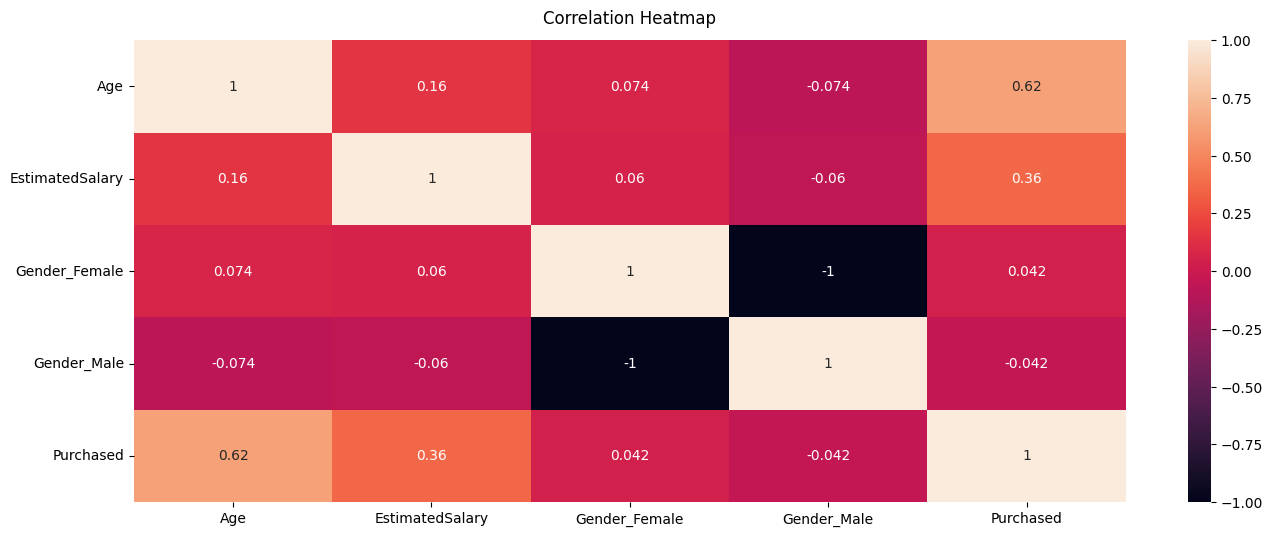

In [ ]:
# The size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_encoded[["Age", "EstimatedSalary", "Gender_Female", "Gender_Male", "Purchased"]].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### 3.3.6 Class imbalance problem

I check if there is a class imbalance problem. Class imbalance is a common problem in machine learning where the categories of the output variable are not represented equally. This can lead to a bias in the predictive model, where it may overfit to the class with the most samples, often at the expense of prediction accuracy for the minority class.

In [ ]:
class_counts = df_encoded['Purchased'].value_counts()
class_counts

0    257
1    143
Name: Purchased, dtype: int64

# 4 Model building

## 4.1 Shuffle

In this step, I shuffle the data randomly to prepare for model building.

In [ ]:
X = df_encoded[['Gender_Male', 'Age', 'EstimatedSalary']]
y = df_encoded['Purchased']
X, y = sklearn.utils.shuffle(X, y)

## 4.2 Split data set

The dataset is split into training set, validation set and test set according to the ratio of 6:2:2. The training set is used to train the models, and validation set and test set are used to evaluate the model performance.

In [ ]:
X_train,X_val_test,y_train,y_val_test = train_test_split(X,y,test_size=0.4,random_state=0)
X_val,X_test,y_val,y_test = train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=0)

## 4.3 Standardize the data

Age, gender and EstimatedSalary are in different ranges and measured in different measurement units, which will affect model performance. In order to solve this problem, we sandardize the features.

In [ ]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_val_sd = StandardScaler().fit_transform(X_val)
X_test_sd = StandardScaler().fit_transform(X_test)

## 4.4 Model selection

To predict whether a user will exhibit purchasing behavior, I employed two distinct models: Logistic Regression and Naive Bayes Classifier. By comparing the results obtained from these models, I aimed to assess their performance and determine the most suitable approach for the given task.

By evaluating and comparing the performance of these two models, I can determine which approach best suits the specific dataset and prediction goal. Metrics such as accuracy, precision, recall, F1 score, roc_auc and confusion matrix can be used to assess and compare the models' predictive capabilities.

When training the models, I also consider the class imbalance problem and use the resampling technique and adjust class weights to address it.

### 4.4.1 GaussianNB

Naive Bayes Classifier is a probabilistic algorithm based on Bayes' theorem. It assumes that the features are conditionally independent given the target variable, making it computationally efficient and particularly useful when dealing with a large number of features. Despite its simplicity and assumption of independence, Naive Bayes can yield competitive results in many classification tasks.

Because the variales in the dataset don't have a high correlation with each other, I believe that Naive Bayes Classifier will be a good choice to make prediction.

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_sd, y_train.ravel())

# Train the model
nb_estimator = naive_bayes.GaussianNB()
nb_estimator.fit(X_train_res, y_train_res)

# On the validation set
nb_y_val = nb_estimator.predict(X_val_sd)
accuracy = accuracy_score(y_val, nb_y_val)
precision = precision_score(y_val, nb_y_val)
recall = recall_score(y_val, nb_y_val)
f1 = f1_score(y_val, nb_y_val)
roc_auc = roc_auc_score(y_val, nb_y_val)
print("Validate accuracy with GaussianNB: {0:.2f}".format(accuracy))
print("Validate precision with GaussianNB: {0:.2f}".format(precision))
print("Validate recall with GaussianNB: {0:.2f}".format(recall))
print("Validate f1-score with GaussianNB: {0:.2f}".format(f1))
print("Validate roc_auc with GaussianNB: {0:.2f}".format(roc_auc))

print()
print()

# Use metrics to evaluate model performance
#On the test set
nb_y_predict = nb_estimator.predict(X_test_sd)
accuracy = accuracy_score(y_test, nb_y_predict)
precision = precision_score(y_test, nb_y_predict)
recall = recall_score(y_test, nb_y_predict)
f1 = f1_score(y_test, nb_y_predict)
roc_auc = roc_auc_score(y_test, nb_y_predict)
print("Test accuracy with GaussianNB: {0:.2f}".format(accuracy))
print("Test precision with GaussianNB: {0:.2f}".format(precision))
print("Test recall with GaussianNB: {0:.2f}".format(recall))
print("Test f1-score with GaussianNB: {0:.2f}".format(f1))
print("Test roc_auc with GaussianNB: {0:.2f}".format(roc_auc))

Validate accuracy with GaussianNB: 0.85
Validate precision with GaussianNB: 0.72
Validate recall with GaussianNB: 0.88
Validate f1-score with GaussianNB: 0.79
Validate roc_auc with GaussianNB: 0.86


Test accuracy with GaussianNB: 0.95
Test precision with GaussianNB: 0.91
Test recall with GaussianNB: 0.97
Test f1-score with GaussianNB: 0.94
Test roc_auc with GaussianNB: 0.95


### 4.4.2 Logistic regression

Logistic Regression is a popular machine learning algorithm used for binary classification. It models the relationship between the independent variables and the probability of a binary outcome, making it well-suited for predicting purchasing behavior. The Logistic Regression model provides interpretable coefficients that quantify the influence of each variable on the target outcome.

In [ ]:
# Train the model
lr_estimator = LogisticRegression(class_weight='balanced')
lr_estimator.fit(X_train_sd, y_train)

# Get the coefficients and intercept of the model
coefficients = lr_estimator.coef_
intercept = lr_estimator.intercept_

# Print the logistic regression equation
equation = 'logit(P) = {} + {} * Gender_Male + {} * Age + {} * EstimatedSalary'.format(
    intercept[0], coefficients[0][0], coefficients[0][1], coefficients[0][2]
)
print("The regression equation is: ")
print(equation)
print("P is the probability of the 'Purchased' event")

print()
print()

# On the validation set
lr_y_val = lr_estimator.predict(X_val_sd)
accuracy = accuracy_score(y_val, lr_y_val)
precision = precision_score(y_val, lr_y_val)
recall = recall_score(y_val, lr_y_val)
f1 = f1_score(y_val, lr_y_val)
roc_auc = roc_auc_score(y_val, lr_y_val)
print("Validate accuracy with Logistic Regression: {0:.2f}".format(accuracy))
print("Validate precision with Logistic Regression: {0:.2f}".format(precision))
print("Validate recall with Logistic Regression: {0:.2f}".format(recall))
print("Validate f1-score with Logistic Regression: {0:.2f}".format(f1))
print("Validate roc_auc with Logistic Regression: {0:.2f}".format(roc_auc))

print()
print()

# On the test set
lr_y_predict = lr_estimator.predict(X_test_sd)
accuracy = accuracy_score(y_test, lr_y_predict)
precision = precision_score(y_test, lr_y_predict)
recall = recall_score(y_test, lr_y_predict)
f1 = f1_score(y_test, lr_y_predict)
roc_auc = roc_auc_score(y_test, lr_y_predict)
print("Test accuracy with Logistic Regression: {0:.2f}".format(accuracy))
print("Test precision with Logistic Regression: {0:.2f}".format(precision))
print("Test recall with Logistic Regression: {0:.2f}".format(recall))
print("Test f1-score with Logistic Regression: {0:.2f}".format(f1))
print("Test roc_auc with Logistic Regression: {0:.2f}".format(roc_auc))

The regression equation is: 
logit(P) = -0.512127983256144 + 0.17779686582053025 * Gender_Male + 2.103933200467163 * Age + 1.0358402974253895 * EstimatedSalary
P is the probability of the 'Purchased' event


Validate accuracy with Logistic Regression: 0.84
Validate precision with Logistic Regression: 0.69
Validate recall with Logistic Regression: 0.92
Validate f1-score with Logistic Regression: 0.79
Validate roc_auc with Logistic Regression: 0.86


Test accuracy with Logistic Regression: 0.86
Test precision with Logistic Regression: 0.81
Test recall with Logistic Regression: 0.84
Test f1-score with Logistic Regression: 0.83
Test roc_auc with Logistic Regression: 0.86


### 4.4.3 Model comparison

For classification problems, we generally use confusion matrix to observe the evaluation results.

1. When the prediction is positive and the real value is also positive, it is true positive.
2. When the prediction is negative and the real value is also negative, it is true negative.
3. When the prediction is positive but the real value is negative, it is false positive.
4. When the prediction is negative but the real value is positive, it is false negative.

Through the confusion matrix, we can not only understand the errors made by the classification model, but also understand the types of errors. This decomposition and display of the results can solve the limitation of using only classification accuracy.

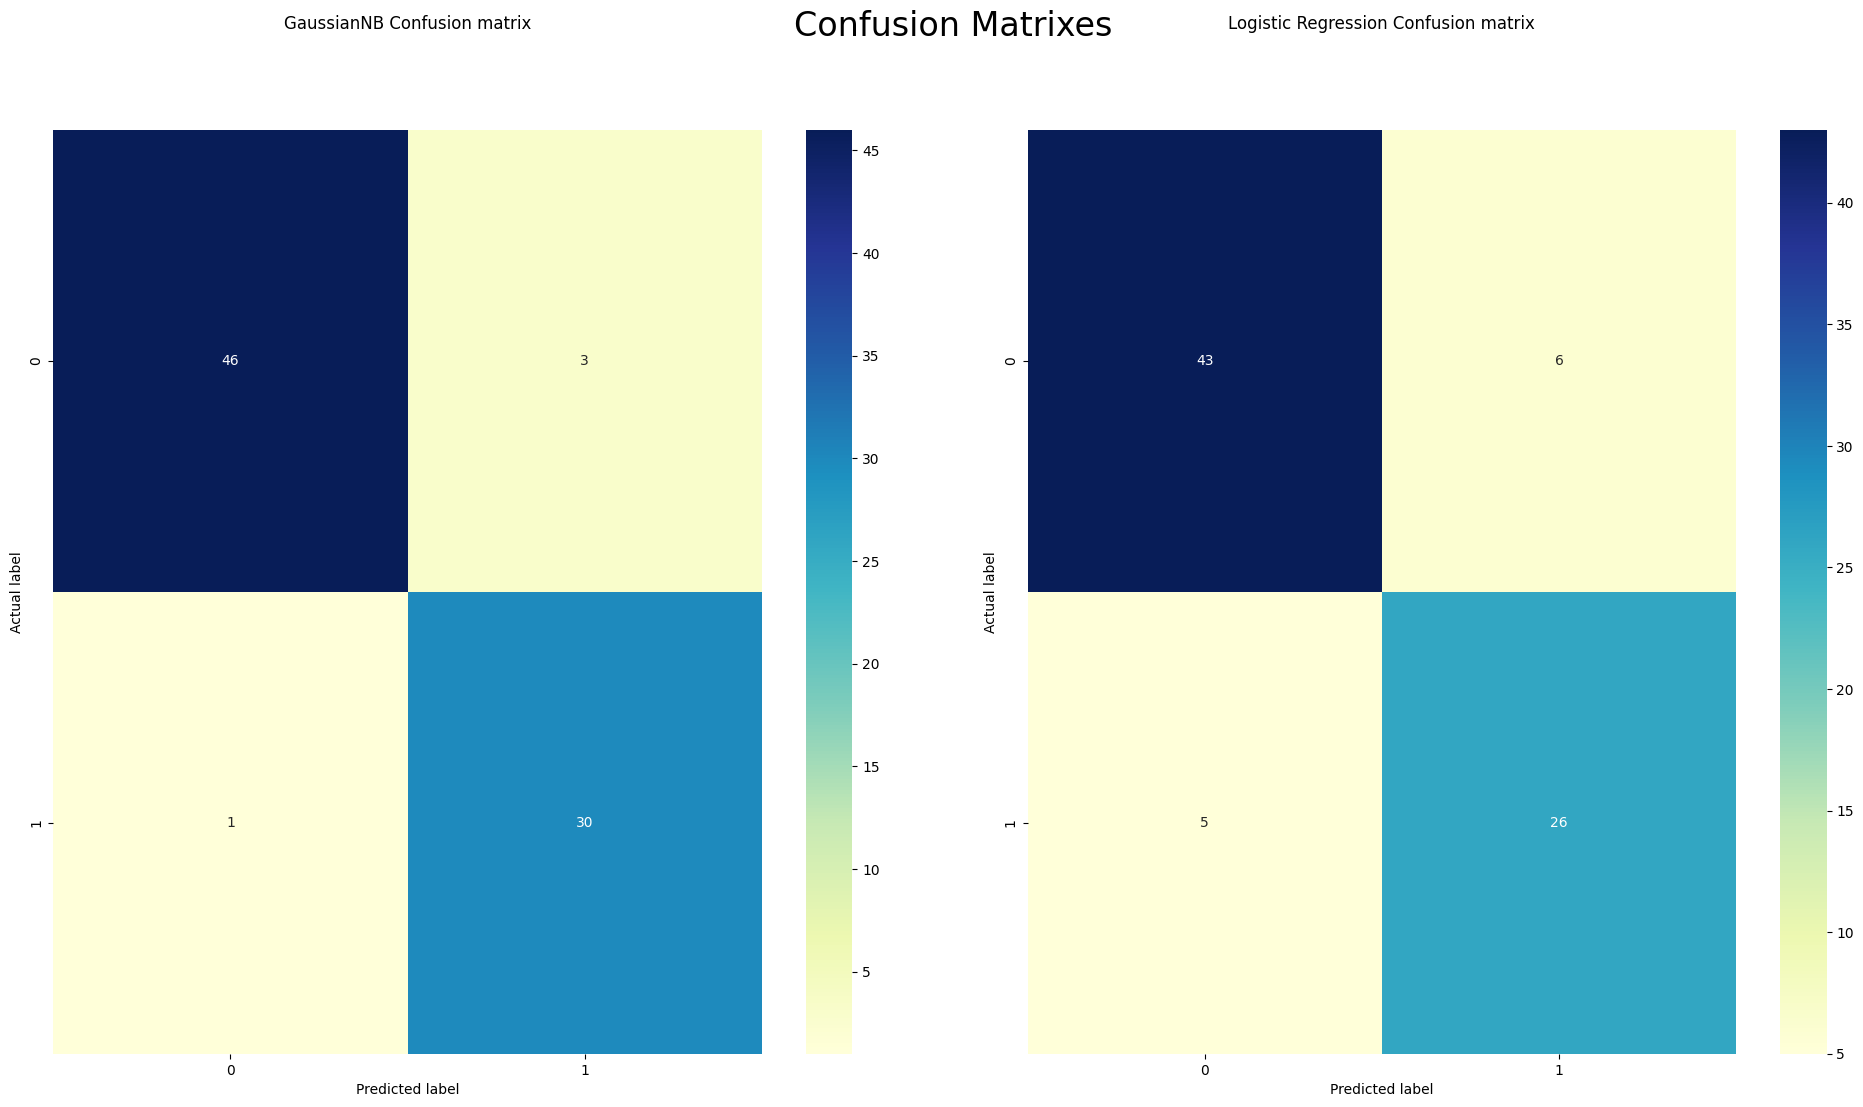

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.1)

plt.subplot(1,2,1)
# metrics.plot_confusion_matrix(estimator, X_test, y_test)
nb_matrix = metrics.confusion_matrix(y_test, nb_y_predict)
p = sns.heatmap(pd.DataFrame(nb_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('GaussianNB Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(1,2,2)
# metrics.plot_confusion_matrix(estimator, X_test, y_test)
lr_matrix = metrics.confusion_matrix(y_test, lr_y_predict)
lr_p = sns.heatmap(pd.DataFrame(lr_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

# 5 Discussion

1. Logistic regression equation is:

logit(P) = -0.512127983256144 + 0.17779686582053025 * Gender_Male + 2.103933200467163 * Age + 1.0358402974253895 * EstimatedSalary

where P is the probability of the 'Purchased' event.


2. Upon a thorough comparison of the Logistic Regression and Naive Bayes classification models on several key performance metrics - including accuracy, precision, recall, F1 score, and ROC_AUC, in addition to analyzing the confusion matrix - we observed superior performance from the Naive Bayes classifier. This suggests that for the specific characteristics and context of the dataset, the Naive Bayes classifier provides a more accurate and reliable predictive model.


3. In the future, I will explore other classification models including Random Forest, Decision Tree and Gradient Boosting Machines (GBM) to make prediction on this dataset.
